# **Week 02**

In [1]:
import torch

In [5]:
# weight w, bias b
w= torch.tensor(2.0, requires_grad=True)
b= torch.tensor(-1.0, requires_grad=True)


def forward(x):
    y= w*x + b
    return y

x= torch.tensor([[1], [3], [4], [5], [6]])
y_hat= forward(x)

print(x)
print(y_hat)

tensor([[1],
        [3],
        [4],
        [5],
        [6]])
tensor([[ 1.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]], grad_fn=<AddBackward0>)


In [23]:
from torch.nn import Linear

torch.manual_seed(1) # to get same results every time

model= Linear(in_features=1, out_features=1)

# for i in model.parameters():
#     print(i)

list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True)]

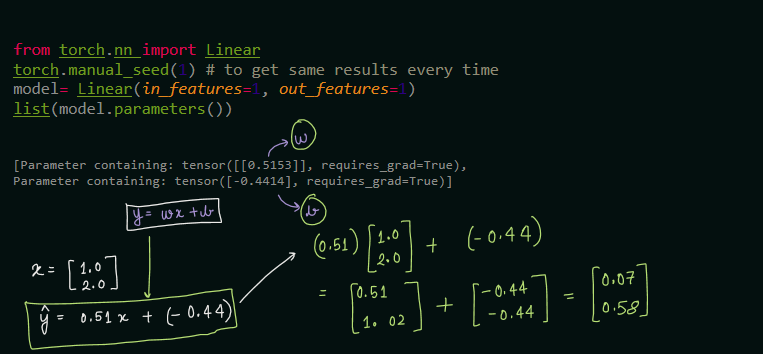

In [24]:
x= torch.tensor([[1.0], [2.0]])
y_hat= model(x)
y_hat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

In [25]:
# Custom Module
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size) -> None:
        super(LinearRegression, self).__init__()
        self.linear= nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)


model= LinearRegression(1, 1)
model.state_dict()['linear.weight'].data[0]= torch.tensor([0.51])
model.state_dict()['linear.bias'].data[0]= torch.tensor([-0.44])

list(model.parameters())

[Parameter containing:
 tensor([[0.5100]], requires_grad=True),
 Parameter containing:
 tensor([-0.4400], requires_grad=True)]

In [26]:
x= torch.tensor([[1.0], [2.0]])
y_hat= model(x)
y_hat

tensor([[0.0700],
        [0.5800]], grad_fn=<AddmmBackward0>)

In [27]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.5100]])),
             ('linear.bias', tensor([-0.4400]))])

In [28]:
print('Keys: ', model.state_dict().keys())
print('Values: ', model.state_dict().values())

Keys:  odict_keys(['linear.weight', 'linear.bias'])
Values:  odict_values([tensor([[0.5100]]), tensor([-0.4400])])
